In [130]:
import random
import matplotlib.pyplot as plt


def generate_interval_matrix(matrix):
    interval_matrix = []
    for i in range(len(matrix)):
        interval_matrix.append([])
        for j in range(len(matrix)):
            interval_matrix[i].append(sum(matrix[i][:(j+1)]))
    return interval_matrix


def generate_chain(matrix):
    state = 0
    transition = 0
    while state != 2:
        val = random.random()
        transition += 1
        j = 0
        while j < len(matrix[state]) and val >= matrix[state][j]:
            j+=1
        state = j
    return transition


def generate_modeling_result(eps, matrix):
    interval_matrix = generate_interval_matrix(matrix)
    y = []
    result = []
    avg_range = 3
    for i in range(10):
        y.append(generate_chain(interval_matrix))
        result.append(sum(y)/len(y))

    while (max(result[-avg_range:]) - min(result[-avg_range:])) > 2 * eps:
        y.append(generate_chain(interval_matrix))
        result.append(sum(y)/len(y))
    return result, sum(result[-3:])/3, len(result)



2.8035974411018945 2058


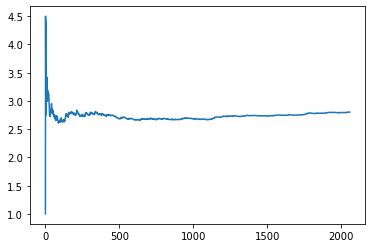

In [142]:
eps = 0.001

shooting_matrix = [[0.2, 0.5, 0.3], [0, 0.6, 0.4], [0, 0, 1]]

shooting_result, shooting_avg, counter = generate_modeling_result(eps, shooting_matrix)
plt.plot(list(range(len(shooting_result))), shooting_result)
print(shooting_avg, counter)


2.1737385701914183 1745


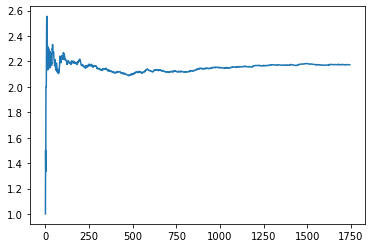

In [147]:
homework_matrix = [[0.3, 0.4, 0.3], [0, 0.2, 0.8], [0, 0, 1]]

homework_result, homework_avg, counter = generate_modeling_result(eps, homework_matrix)
plt.plot(list(range(len(homework_result))), homework_result)
print(homework_avg, counter)